In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./loan_approval_dataset.csv')
print(df.shape)
df.head()

(4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
columns = df.columns.to_frame().transpose().to_dict('records')[0]
for key in df.columns.to_frame().transpose().to_dict('records')[0]:
  columns[key] = key.replace(" ","")
df = df.rename(columns=columns)

## Data manipulation

* education => Graduate - 0 / Not Graduate - 1
* self_employes => No - 0 / Yes - 1
* loan_status => Approved - 0 / Rejected - 1

In [4]:
df['education'] = pd.factorize(df['education'])[0]
df['self_employed'] = pd.factorize(df['self_employed'])[0]
df['loan_status'] = pd.factorize(df['loan_status'])[0]

c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure la

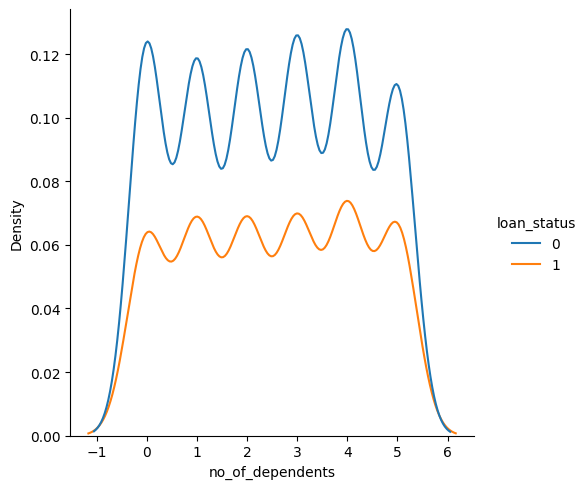

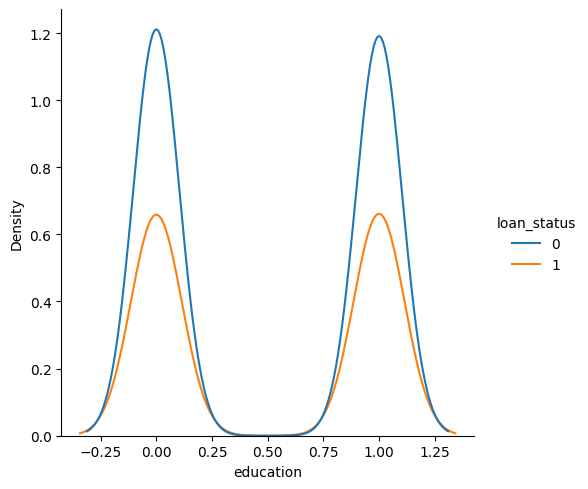

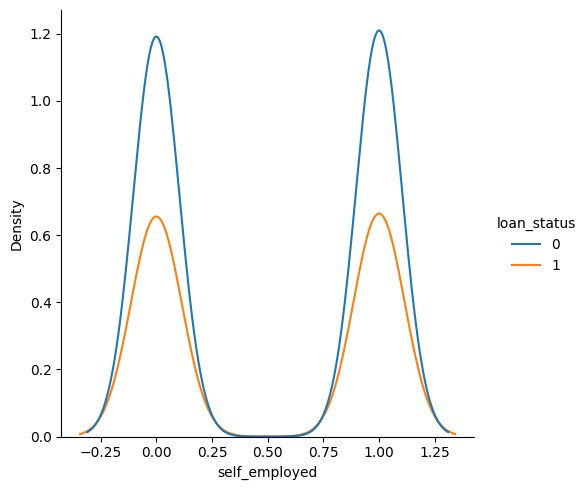

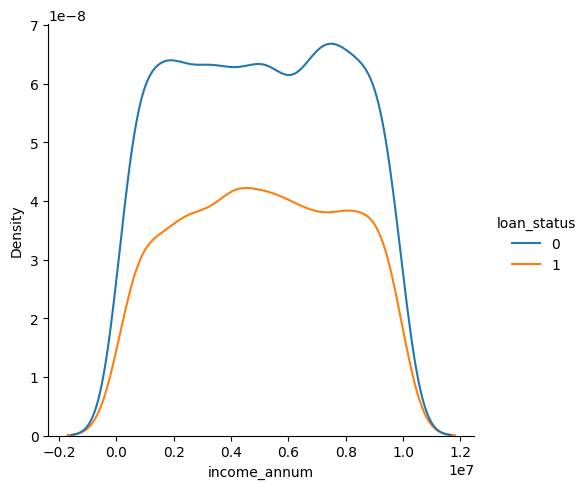

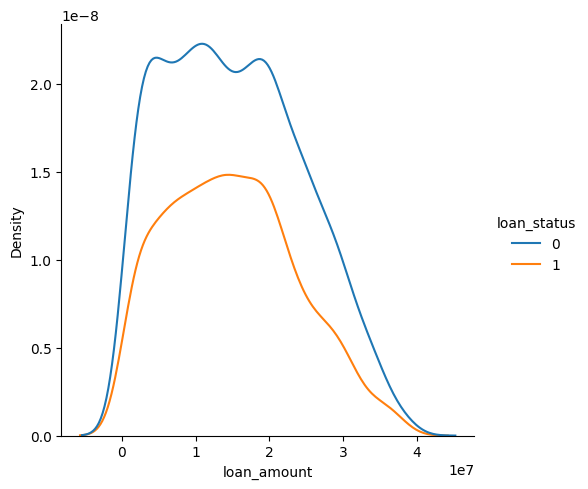

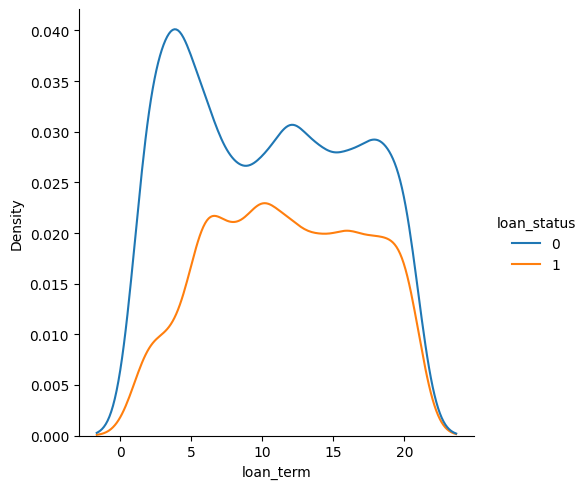

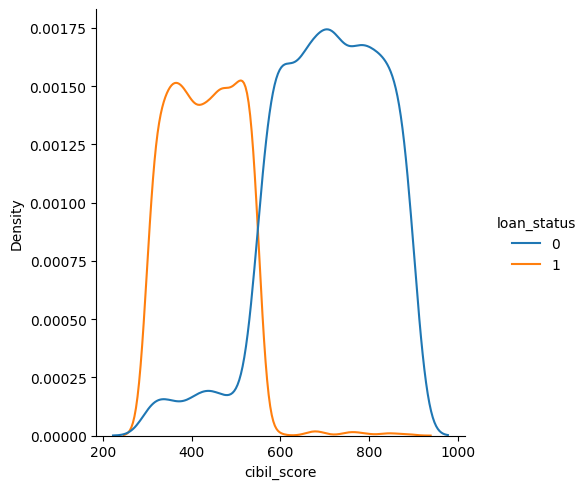

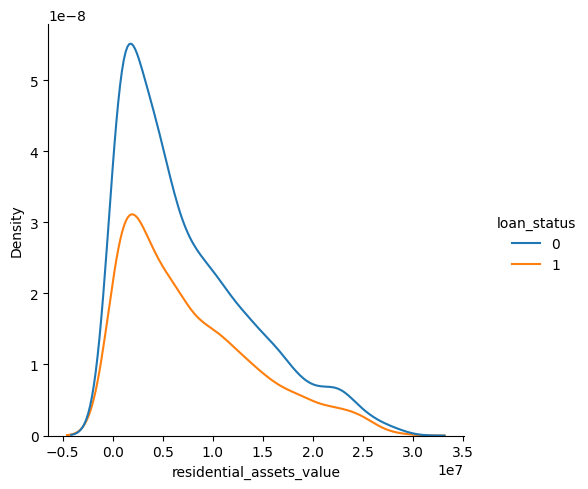

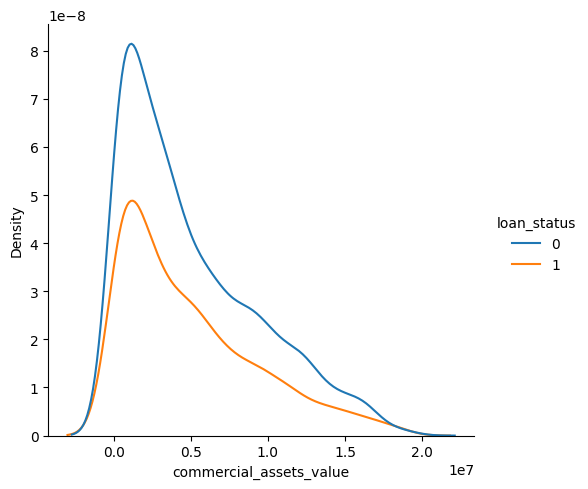

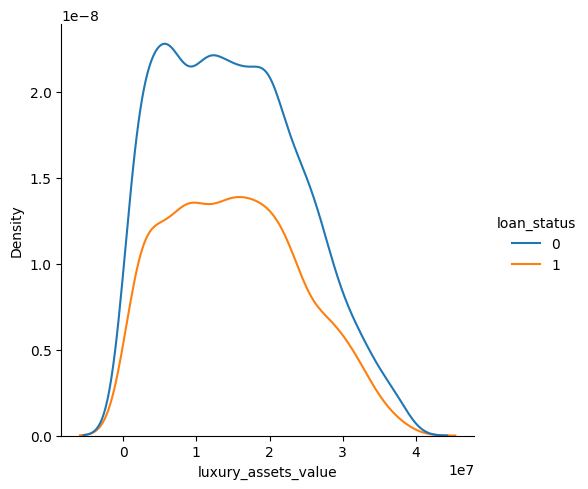

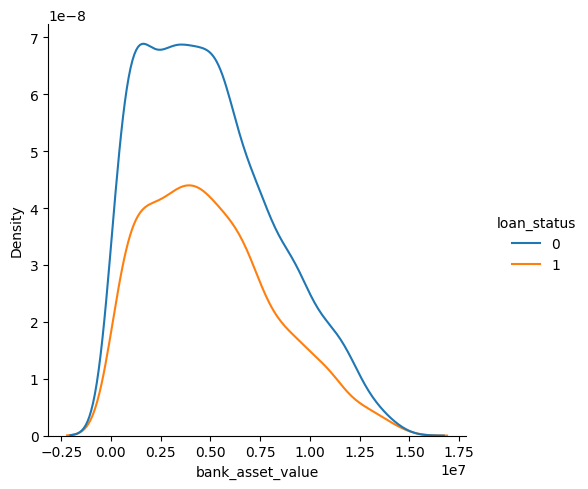

In [5]:
for i in range(1,12):
  g = sns.displot(data=df, x=df.columns[i], hue='loan_status', kind='kde')
  g.set_titles(df.columns[i])

In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[[col for col in df.columns if col not in ['loan_status']]], df['loan_status'], test_size=0.30, stratify=df['loan_status'])

In [8]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
accuracy = accuracy_score(y_test, tree.predict(X_test))
accuracy

0.9718969555035128